 # Plot Time Series Data.

### Import required packages.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pylab as plt
%matplotlib inline


### Create time series data set and plot time series data.

In [4]:
# Create Amtrak data frame.
Amtrak_data = pd.read_csv('Amtrak_comp.csv')

# Display the first 5 records of Amtrak data set.

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month)

# Convert data set to time series  data set. Name is used 
# to label the data.
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Define Amtrak time series frequency as month 'MS'. 
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq = 'MS')

# Display first 5 records of Amtrak time series data.
print(ridership_ts.head())
ridership_ts.tail()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64


Date
2018-08-01    2848.935
2018-09-01    2522.367
2018-10-01    2807.200
2018-11-01    2873.968
2018-12-01    2668.049
Freq: MS, Name: Ridership, dtype: float64

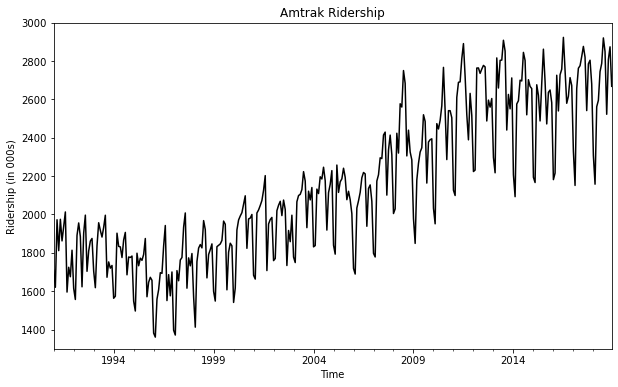

In [12]:
# Plot time series data.
ax = ridership_ts.plot(figsize = (10,6), color = 'black')
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 3000)
plt.title('Amtrak Ridership') 
plt.show()

### Develop regression models for time series data. Plot time series data with regression models. 

In [7]:
# Create a time series with additional linear trend term/index 
# 't' as independent variable. 
ridership_df = tsatools.add_trend(ridership_ts, trend='t')

# Display Amtrak data with trend index. 
print (ridership_df)

# Fit a linear regression model to the time series with 
# linear trend.
ridership_lin = sm.ols(formula='Ridership ~ trend', 
                       data=ridership_df).fit()

            Ridership  trend
Date                        
1991-01-01   1708.917    1.0
1991-02-01   1620.586    2.0
1991-03-01   1972.715    3.0
1991-04-01   1811.665    4.0
1991-05-01   1974.964    5.0
...               ...    ...
2018-08-01   2848.935  332.0
2018-09-01   2522.367  333.0
2018-10-01   2807.200  334.0
2018-11-01   2873.968  335.0
2018-12-01   2668.049  336.0

[336 rows x 2 columns]


In [8]:
# Create a data frame with additional independent variables 
# from time series: a trend term/index and a quadratic 
# trend/index. 

# Fit a linear regression model to the time series with quadratic trend.
ridership_quad = sm.ols(formula='Ridership ~ trend + np.square(trend)', 
                        data=ridership_df).fit()

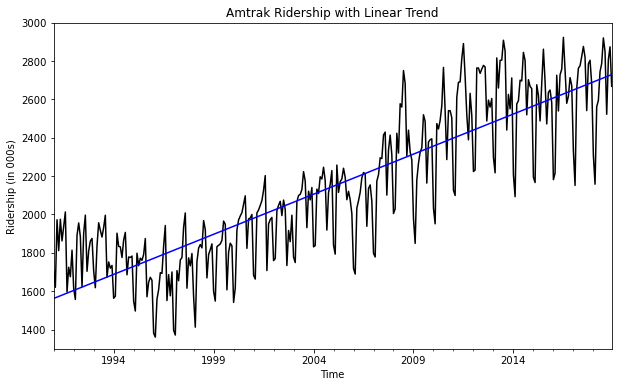

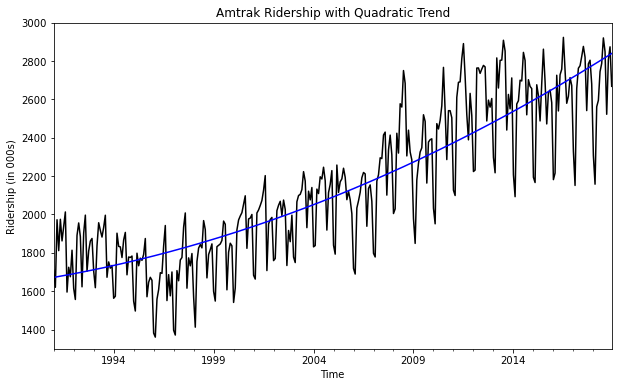

In [13]:
# Create plot of time series with linear trend. 
fig, ax = plt.subplots(figsize=(10,6))
ridership_ts.plot(color = 'black')
ridership_lin.predict(ridership_df).plot(color = 'blue')
ax.set(xlabel = 'Time',
       ylabel = 'Ridership (in 000s)',
       ylim = [1300, 3000],
       title = 'Amtrak Ridership with Linear Trend')
plt.show()

# Create plot of time series with quadratic trend. 
fig, ax = plt.subplots(figsize=(10,6))
ridership_ts.plot(color = 'black')
ridership_quad.predict(ridership_df).plot(color = 'blue')
ax.set(xlabel = 'Time',
       ylabel = 'Ridership (in 000s)',
       ylim = [1300, 3000],
       title = 'Amtrak Ridership with Quadratic Trend')
plt.show()

### Zoom-in plot of time series data.

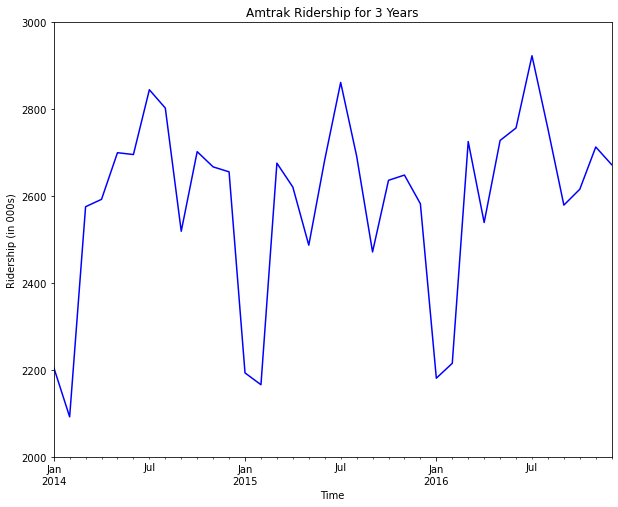

In [16]:
# Create zoom-in time series data set 
# from 1997 to 1999 using a slice of 1997-1999 data. 
ridership_ts_3yrs = ridership_ts['2014':'2016']

# Plot time series data using zoom-in data set.
ax = ridership_ts_3yrs.plot(figsize = (10,8), color = 'blue')
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(2000, 3000)
plt.title('Amtrak Ridership for 3 Years') 
plt.show()
